# 🚲 01. 탐색적 데이터 분석 (EDA)

## 1. 프로젝트 개요


본 프로젝트는 자전거 대여 시스템의 운영 데이터를 분석하고, 이를 기반으로 자전거 대여 수요를 예측하는 모델을 개발하는 것을 목표로 한다.  
프로젝트의 최종 목표는 RMSLE (Root Mean Squared Logarithmic Error)를 최소화하는 예측 모델을 구축하는 것이다.

EDA 단계에서는 데이터의 기본 구조와 변수별 특성을 파악하고, 변수 간의 관계를 분석하고자 한다.
본 단계에서 확인한 주요 결과는 피처 엔지니어링과 모델링 단계에 반영할 것이다.

## 2. 데이터 불러오기 및 확인


In [1]:
import pandas as pd 

test = pd.read_csv(r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\raw\test.csv')
train = pd.read_csv(r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\raw\train.csv')

print("Train 데이터 크기:", train.shape)
print("Test 데이터 크기:", test.shape) 

Train 데이터 크기: (10886, 12)
Test 데이터 크기: (6493, 9)


In [2]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [4]:
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [5]:
test.describe(include='all')

# test 데이터는 casual	registered	count 이 변수들이 없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
# ===== datetime 처리 및 파생 변수 생성 =====

# datetime 컬럼을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# datetime에서 파생 변수 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday  # 월=0, 일=6

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday  # 월=0, 일=6

# ===== 범주형 변수 변환 =====

# season, weather, holiday, workingday → 범주형으로 변환
category_columns = ['season', 'weather', 'holiday', 'workingday']

for col in category_columns:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

**datetime 처리 및 파생 변수 생성**

- `datetime` 컬럼을 pandas의 datetime 타입으로 변환하여 시간 관련 속성 추출이 가능하도록 변환함.
- year, month, day, hour, weekday(요일) 등 주요 시간 기반 파생 변수 생성.

**범주형 변수 변환**

- season, weather, holiday, workingday 변수는 고정된 값의 범주형 변수이므로 모델 학습 시 범주형으로 변환하여 처리.


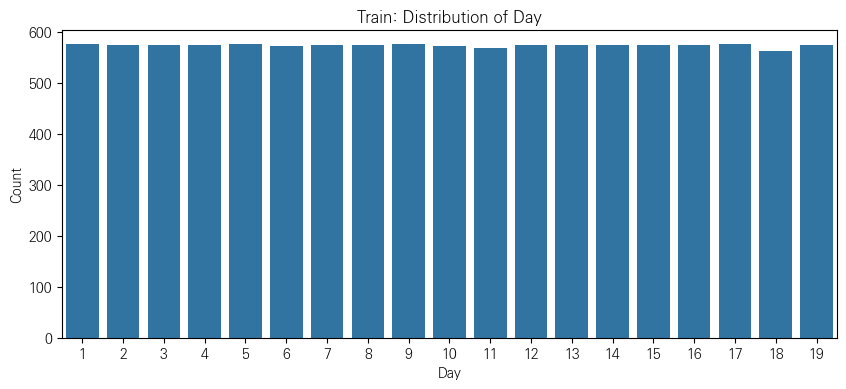

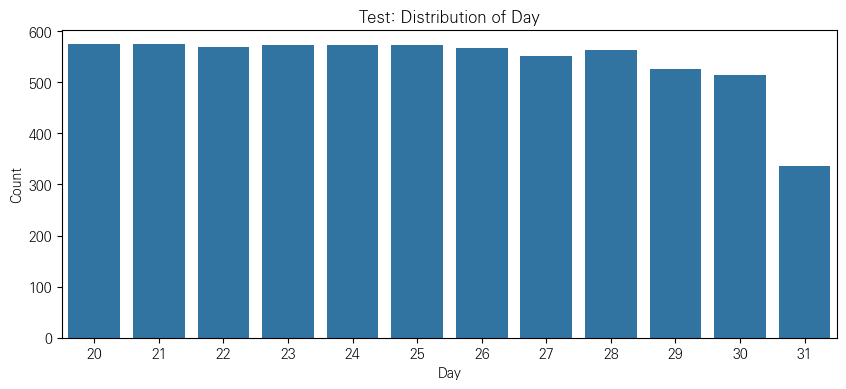

In [12]:
# ===== day 변수 분포 시각화 =====

# 시각화 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터 day 분포 확인
plt.figure(figsize=(10, 4))
sns.countplot(data=train, x='day')
plt.title('Train: Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

# test 데이터 day 분포 확인
plt.figure(figsize=(10, 4))
sns.countplot(data=test, x='day')
plt.title('Test: Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**day 변수 분포 시각화**

- `train`과 `test` 데이터셋에서 `day` 변수의 분포를 시각화하여 확인.
- train 데이터는 day 값이 1일부터 19일까지 존재.
- test 데이터는 day 값이 20일부터 31일까지 존재.
- 두 데이터셋 간 day 변수의 분포 불일치가 존재하므로, Feature 사용 여부 결정 시 참고.

## 3. 결측치 및 이상치 확인


### 결측치

In [134]:
# 결측치 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

In [135]:
# 결측치 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

### 결측치 없는 것으로 확인.

### 변수 유형 정리

| 변수명         | 데이터 타입 | 설명                                 | 변수 유형 |
|----------------|-------------|--------------------------------------|-----------|
| datetime       | object      | 날짜 및 시간                         | 시간 관련 |
| season         | int64       | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울) | 범주형    |
| holiday        | int64       | 공휴일 여부 (0: 평일, 1: 공휴일)         | 범주형    |
| workingday     | int64       | 근무일 여부 (0: 주말/공휴일, 1: 근무일)  | 범주형    |
| weather        | int64       | 날씨 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설) | 범주형    |
| temp           | float64     | 실측 온도 (섭씨)                     | 수치형    |
| atemp          | float64     | 체감 온도 (섭씨)                     | 수치형    |
| humidity       | int64       | 습도 (%)                             | 수치형    |
| windspeed      | float64     | 풍속 (m/s)                           | 수치형    |
| casual         | int64       | 등록되지 않은 사용자의 대여 수         | 수치형    |
| registered     | int64       | 등록된 사용자의 대여 수               | 수치형    |
| count          | int64       | 총 대여 수 (target 변수)               | 수치형    |


### 이상치

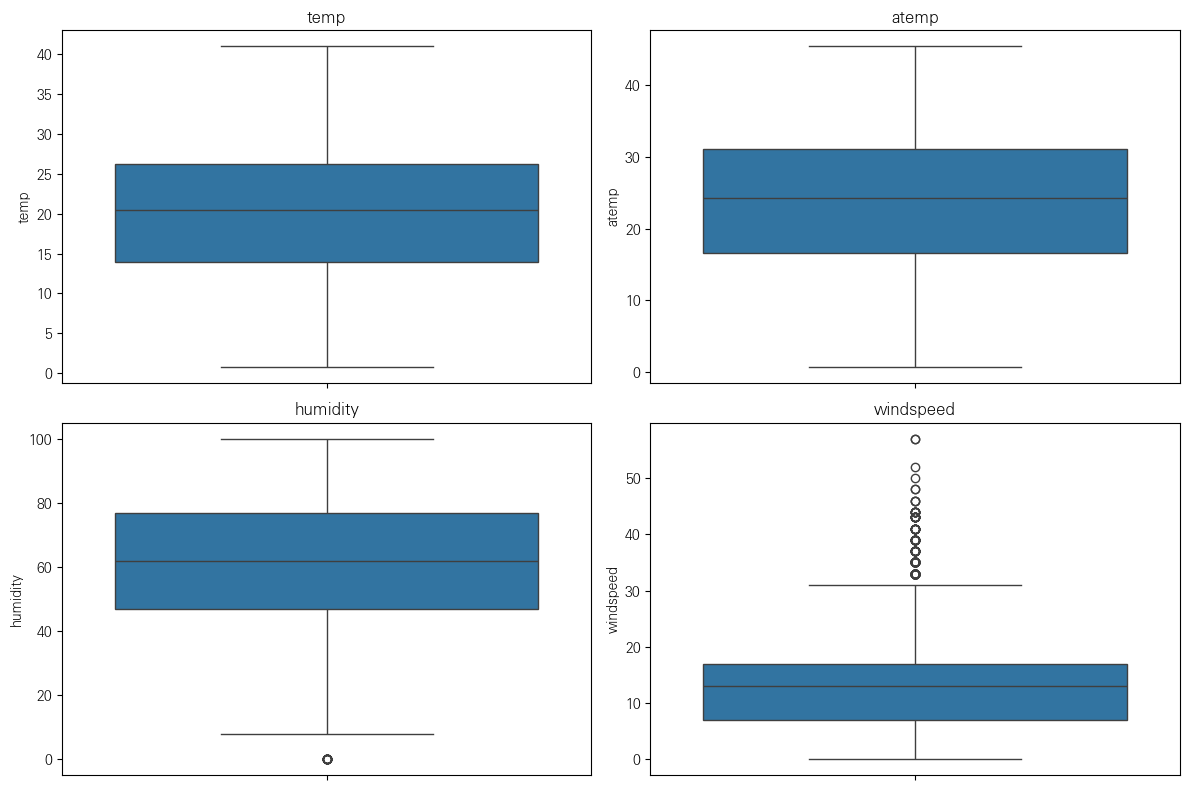

In [15]:
# ===== boxplot으로 이상치 확인 =====

import matplotlib.pyplot as plt
import seaborn as sns

num_cols1 = ['temp', 'atemp', 'humidity', 'windspeed']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols1):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=train, y=col)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()


**boxplot으로 이상치 확인**

- temp, atemp, humidity, windspeed 변수에 대해 boxplot 시각화를 통해 이상치 존재 여부를 확인.
- temp, atemp는 비교적 안정적인 분포 확인.
- humidity, windspeed 변수에서 극단적인 값(이상치) 존재 확인됨.
- 이상치 처리 여부는 모델 성능에 영향을 줄 수 있으므로 별도 판단하여 적용 여부 결정 예정.

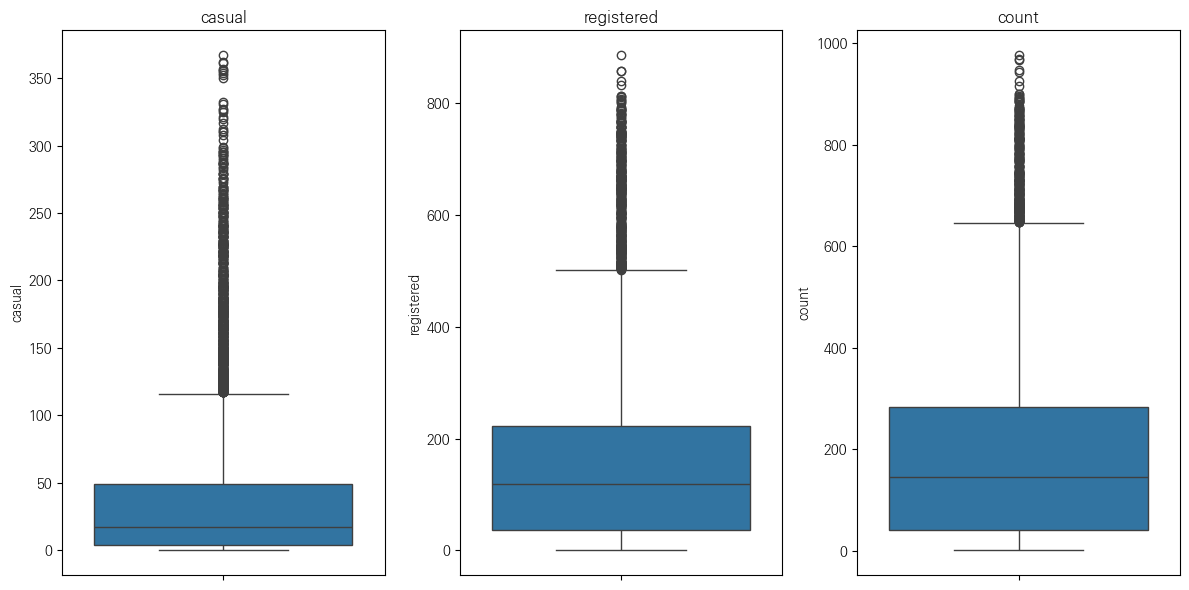

In [17]:
# ===== boxplot으로 이상치 확인 (casual, registered, count) =====

# 이상치 확인할 수치형 변수 리스트 (2)
num_cols2 = ['casual', 'registered', 'count']

# boxplot 시각화
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols2):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=train, y=col)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()


**boxplot으로 이상치 확인 (casual, registered, count)**

- casual, registered, count 변수에 대해 boxplot 시각화를 통해 이상치 존재 여부를 확인.
- count 변수는 오른쪽으로 긴 꼬리를 가지며 고빈도 이상치가 존재함.
- casual과 registered 역시 일부 극단적인 값 확인됨.
- 특히 count 변수는 log 변환 여부를 이후 단계에서 검토 예정.


In [19]:
# ===== IQR을 이용한 humidity 이상치 제거 =====

# humidity 변수에서 IQR 기준으로 이상치를 제거하려고 시도한 코드.
# 실제로 해보니 모델 성능이 오히려 나빠져서 최종적으로는 적용하지 않음.
# 기록 차원에서 코드만 남겨둠.

# Q1 = train['humidity'].quantile(0.25)
# Q3 = train['humidity'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# IQR 범위 내 값만 남기기
# train = train[(train['humidity'] >= lower_bound) & (train['humidity'] <= upper_bound)]

**humidity 이상치 제거 시도**

- humidity 변수는 boxplot 상에서 극단적인 값이 일부 확인되었음.
- IQR(Interquartile Range)를 기준으로 이상치를 제거하는 방법을 시도.
- 다만, 이상치 제거 후 모델 성능이 오히려 저하되는 결과가 나타났음.
- 최종적으로 humidity 변수는 원본 값을 그대로 유지하여 모델에 사용하기로 결정.


In [20]:
# train 데이터의 총 행(row) 수
print("총 데이터 수:", len(train))

총 데이터 수: 10886


casual / registered / count 모두 outlier 존재 → 특히 상단에서 다수의 outlier 확인됨 → 자연스러운 현상임 (이런 분포가 많이 나옴).

        casual → 상위 소수 사용자들이 비정상적으로 많이 대여한 경우 존재  
        registered → 상위 고정 사용자 그룹의 대여 패턴 존재  
        (count → 당연히 casual + registered 합 → 같이 이상치 발생)



-----------------

### 구간 매핑

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\1451257321.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()
C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\1451257321.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()
C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\1451257321.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

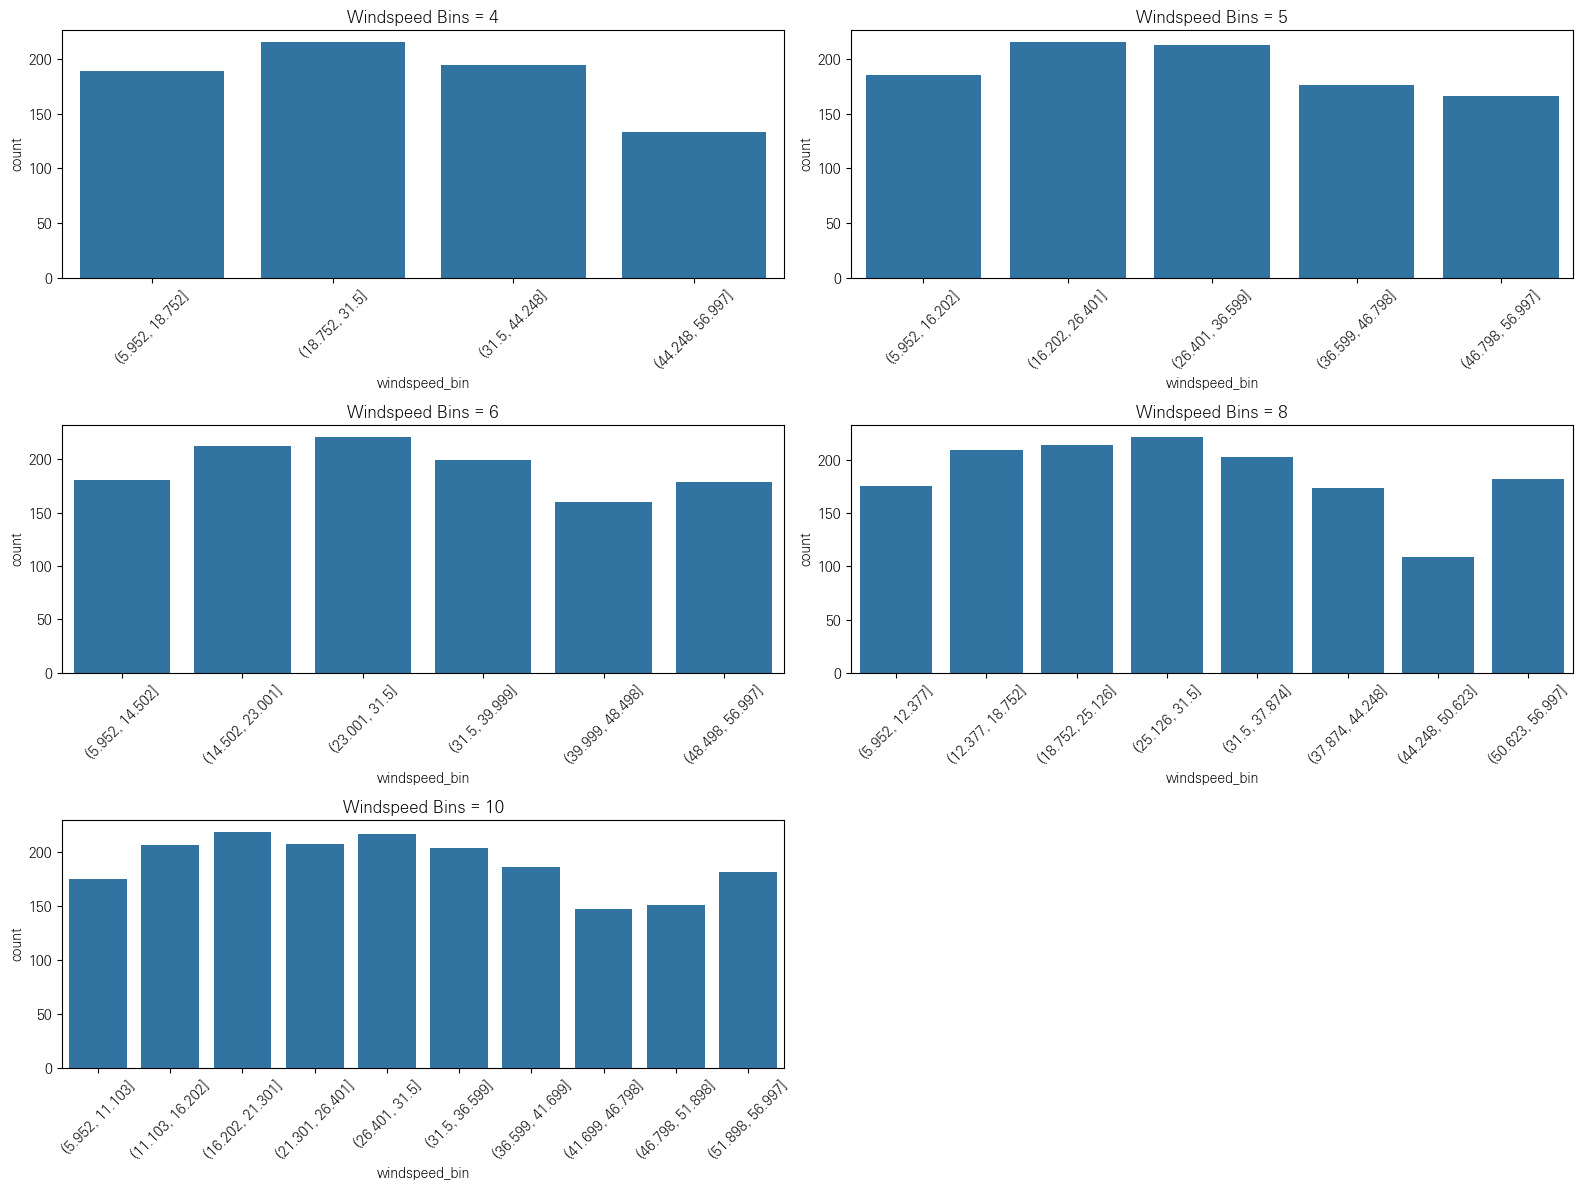

In [24]:
# ===== windspeed 구간별 시각화 =====

import matplotlib.pyplot as plt
import seaborn as sns

# windspeed 시각화용 함수 (축만 그려주는 부분으로 변경)
def get_windspeed_bins_plot_data(n_bins):
    # 0 제외
    windspeed_nonzero = train[train['windspeed'] != 0]['windspeed']
    bins = pd.cut(windspeed_nonzero, bins=n_bins)
    
    # 각 bin 별 count 평균 구하기
    df_bin = train[train['windspeed'] != 0].copy()
    df_bin['windspeed_bin'] = bins
    grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()
    
    return grouped

# 여러 개 subplot으로 한 화면에 출력
n_list = [4, 5, 6, 8, 10]

plt.figure(figsize=(16, 12))  # 크기 넉넉하게

for i, n_bins in enumerate(n_list):
    grouped = get_windspeed_bins_plot_data(n_bins)
    
    plt.subplot(3, 2, i+1)  # 3행 2열로 배치 (5개 그래프)
    sns.barplot(data=grouped, x='windspeed_bin', y='count')
    plt.title(f'Windspeed Bins = {n_bins}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show();


**windspeed 구간 매핑 시각화**

- windspeed 변수에서 0값을 제외한 후 구간(bin)을 나누어 count 평균과의 관계를 시각화.
- 여러 구간 수(n_bins)에 대해 시각화를 비교하여 최적의 구간 수를 판단하기 위함.
- 기존에는 plot이 개별적으로 출력되어 길게 나왔으나, 한 화면에 subplot으로 정리하여 비교하기 쉽게 구성.
- 최종적으로 windspeed는 6개 구간으로 구간화하여 사용하는 것으로 결정.

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\3972226922.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()
C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\3972226922.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()
C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\3972226922.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True

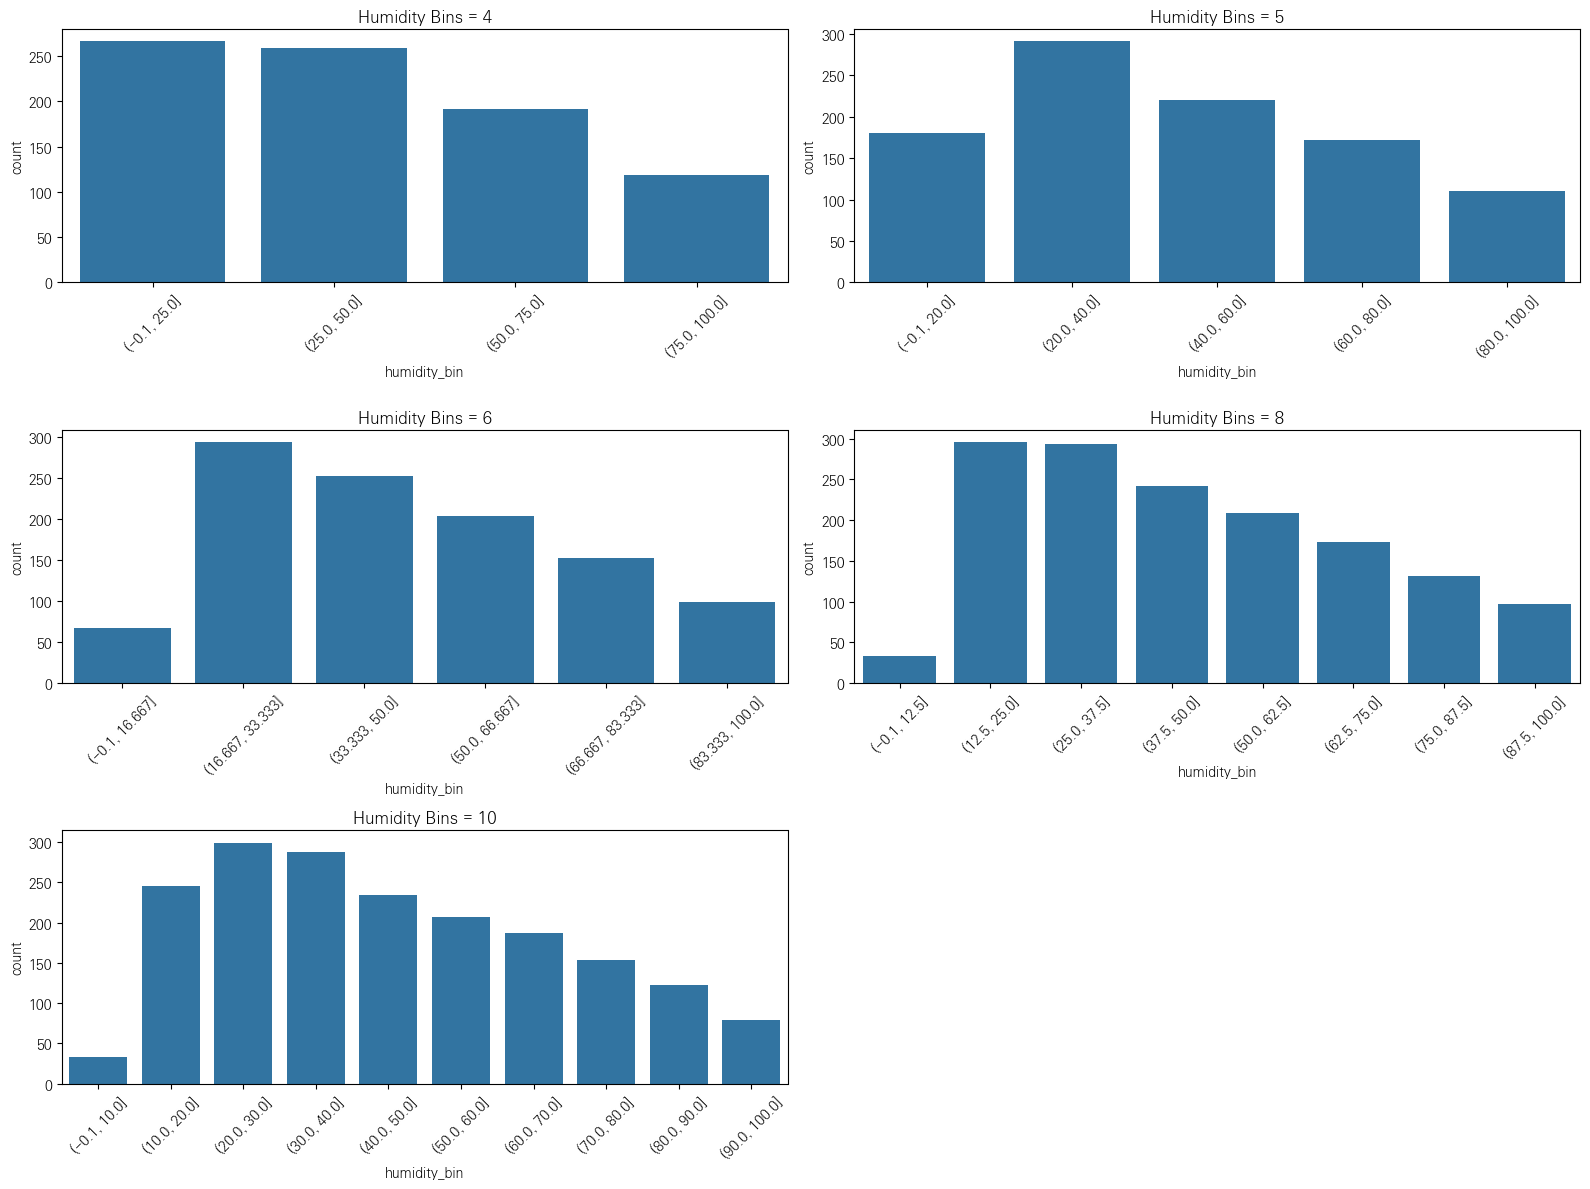

In [25]:
# ===== humidity 구간 매핑 시각화 =====

# humidity 시각화용 함수
def get_humidity_bins_plot_data(n_bins):
    bins = pd.cut(train['humidity'], bins=n_bins)
    
    df_bin = train.copy()
    df_bin['humidity_bin'] = bins
    grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()
    
    return grouped

# 여러 개 subplot으로 한 화면에 출력
n_list = [4, 5, 6, 8, 10]

plt.figure(figsize=(16, 12))  # 크기 넉넉하게

for i, n_bins in enumerate(n_list):
    grouped = get_humidity_bins_plot_data(n_bins)
    
    plt.subplot(3, 2, i+1)  # 3행 2열로 배치 (5개 그래프)
    sns.barplot(data=grouped, x='humidity_bin', y='count')
    plt.title(f'Humidity Bins = {n_bins}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**humidity 구간 매핑 시각화**

- humidity 변수는 연속형 변수로서 일정 구간으로 나누어 count 평균과의 관계를 분석.
- 다양한 구간 수(n_bins)에 대해 시각화를 비교하여 최적의 구간 수를 선택.
- 기존에는 각 구간별 plot이 개별적으로 출력되어 확인이 불편했으므로, subplot으로 한 화면에 정리하여 비교.
- 최종적으로 humidity는 10개 구간으로 구간화하여 사용하는 것으로 결정.

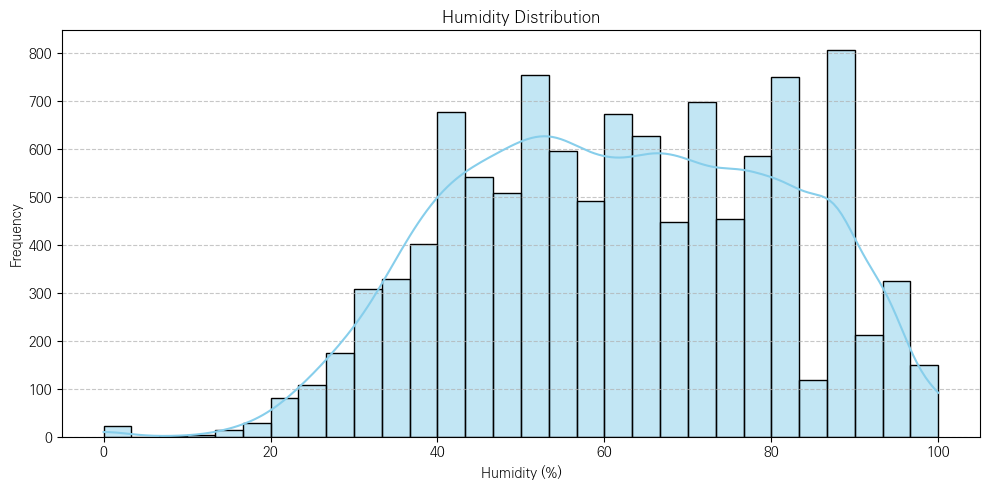

In [26]:
# ===== humidity 분포 시각화 (히스토그램 + KDE) =====

import seaborn as sns
import matplotlib.pyplot as plt

# humidity 변수의 전체 분포 확인 (히스토그램 + 커널 밀도 추정 포함)
plt.figure(figsize=(10, 5))
sns.histplot(train['humidity'], bins=30, kde=True, color='skyblue')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축만 그리드 추가 (가독성용)
plt.tight_layout()
plt.show()

**humidity 분포 시각화**

- humidity 변수의 전체 분포를 히스토그램과 커널 밀도 추정(KDE)을 통해 시각화.
- 데이터가 어느 구간에 집중되어 있는지 확인하기 위함.
- 20~60% 구간에 데이터가 몰려 있으며, 일부 극단적인 값도 존재하는 것을 확인할 수 있음.
- 이상치 제거 여부 결정 시 참고 자료로 활용.
- 이상치 존재. (0) 오류라 생각하고 추후에 삭제 예정.

In [ ]:
# ===== windspeed 구간 매핑 =====

windspeed_nonzero = train[train['windspeed'] != 0]['windspeed']

# windspeed를 6개의 구간으로 나눔
n_bins_wind = 6
bins_wind = pd.cut(windspeed_nonzero, bins=n_bins_wind)

# windspeed_bin 컬럼 생성 (구간 정보 추가)
df_bin = train[train['windspeed'] != 0].copy()
df_bin['windspeed_bin'] = bins_wind

# 각 구간의 중앙값 계산 (나중에 매핑에 사용)
bin_centers_wind = df_bin.groupby('windspeed_bin')['windspeed'].mean()

# 중앙값 매핑용 딕셔너리 생성
bin_center_dict_wind = {}
for interval in bin_centers_wind.index.categories:
    bin_center_dict_wind[interval] = bin_centers_wind.loc[interval]

# windspeed 값 → 각 구간 중앙값으로 변환하는 함수 정의
# 0값은 그대로 유지 (0 → 0), 나머지는 해당 구간 중앙값으로 매핑
def map_windspeed(value):
    if value == 0:
        return 0
    for interval in bin_center_dict_wind:
        if value in interval:
            return bin_center_dict_wind[interval]
    return value

# 최종적으로 windspeed_mapped 컬럼 생성 (train, test 모두 적용)
train['windspeed_mapped'] = train['windspeed'].apply(map_windspeed)
test['windspeed_mapped'] = test['windspeed'].apply(map_windspeed)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\1355939721.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers_wind = df_bin.groupby('windspeed_bin')['windspeed'].mean()


**windspeed 구간 매핑 적용**

- windspeed 변수는 값이 띄엄띄엄 존재.
- windspeed가 0인 경우는 그대로 유지하고, 나머지 값은 6개의 구간으로 나눈 뒤 각 구간의 중앙값으로 변환하여 사용.
- 구간 중앙값을 기반으로 매핑함으로써 모델이 windspeed의 노이즈 영향을 덜 받게 하고 학습 안정성을 높이기 위한 처리.
- 최종적으로 train, test 데이터에 모두 동일한 방식으로 windspeed_mapped 컬럼을 생성하여 적용.

In [160]:
# 구간 나누기
n_bins_hum = 10
bins_hum = pd.cut(train['humidity'], bins=n_bins_hum)

# humidity_bin 컬럼 생성
df_bin_hum = train.copy()
df_bin_hum['humidity_bin'] = bins_hum

# 각 bin → 중앙값 구하기 (매핑용)
bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()

# mapping dict 만들기
bin_center_dict_hum = {}
for interval in bin_centers_hum.index.categories:
    bin_center_dict_hum[interval] = bin_centers_hum.loc[interval]

# mapping 함수
def map_humidity(value):
    for interval in bin_center_dict_hum:
        if value in interval:
            return bin_center_dict_hum[interval]
    return value

# 최종 mapped 컬럼 생성
train['humidity_mapped'] = train['humidity'].apply(map_humidity)
test['humidity_mapped'] = test['humidity'].apply(map_humidity)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_31972\1740611126.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()


In [29]:
# ===== humidity 0값 → 보간(interpolation)으로 대체 =====

import numpy as np

# humidity 값이 0인 건 현실적으로 불가능하므로, 보간 처리를 적용.
# 시계열 데이터이므로 interpolate()로 앞뒤 값 자연스럽게 채워 넣음.

# 먼저 humidity 0값이 몇 개인지 확인
print(f"Humidity 0값 개수 (처리 전): {(train['humidity'] == 0).sum()}")

# humidity 0값 보간 적용
train['humidity'] = train['humidity'].replace(0, np.nan)
train['humidity'] = train['humidity'].interpolate()

# 보간 후 남은 결측치가 혹시 있다면 한 번 더 확인 (없어야 정상)
print(f"Humidity 결측치 개수 (처리 후): {train['humidity'].isnull().sum()}")

Humidity 0값 개수 (처리 전): 22
Humidity 결측치 개수 (처리 후): 0


In [30]:
# ===== humidity 구간 매핑 =====

# humidity를 10개의 구간으로 나눔
n_bins_hum = 10
bins_hum = pd.cut(train['humidity'], bins=n_bins_hum)

# humidity_bin 컬럼 생성 (구간 정보 추가)
df_bin_hum = train.copy()
df_bin_hum['humidity_bin'] = bins_hum

# 각 구간의 중앙값 계산 (매핑에 사용할 값)
bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()

# 중앙값 매핑용 딕셔너리 생성
bin_center_dict_hum = {}
for interval in bin_centers_hum.index.categories:
    bin_center_dict_hum[interval] = bin_centers_hum.loc[interval]

# humidity 값 → 각 구간 중앙값으로 변환하는 함수 정의
def map_humidity(value):
    for interval in bin_center_dict_hum:
        if value in interval:
            return bin_center_dict_hum[interval]
    return value

# 최종적으로 humidity_mapped 컬럼 생성 (train, test 모두 적용)
train['humidity_mapped'] = train['humidity'].apply(map_humidity)
test['humidity_mapped'] = test['humidity'].apply(map_humidity)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\3861007644.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()


**humidity 구간 매핑 적용**

- humidity 변수는 10개의 구간으로 나눈 뒤 각 구간의 중앙값으로 변환하여 사용.
- 이를 통해 모델이 humidity의 노이즈 영향을 줄이고 보다 안정적으로 학습할 수 있도록 처리.
- humidity는 이상치 제거는 적용하지 않고 원본 값을 그대로 구간화하여 처리하는 방향을 선택.
- 최종적으로 train, test 데이터에 동일한 방식으로 humidity_mapped 컬럼을 생성하여 적용.

## 4. 변수별 분석
- 시간 관련 변수
- 범주형 변수 (season, holiday, workingday, weather)
- 수치형 변수 (temp, atemp, humidity, windspeed)

In [32]:
# 변수별 기본 통계 확인
train.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,62.081481,8.0,47.0,62.0,78.0,100.0,19.105536
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019
month,10886.0,6.521495,1.0,4.0,7.0,10.0,12.0,3.444373


### 계절 이상

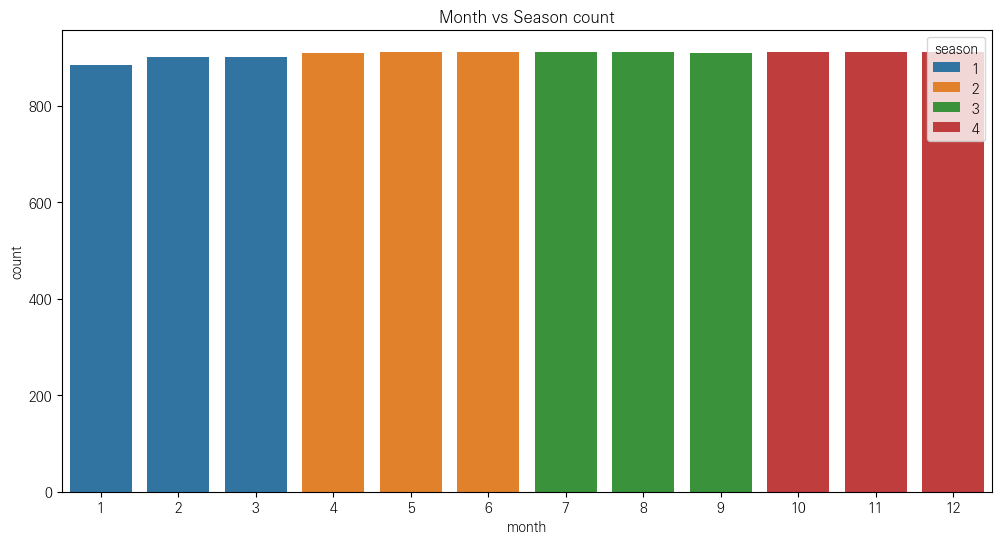

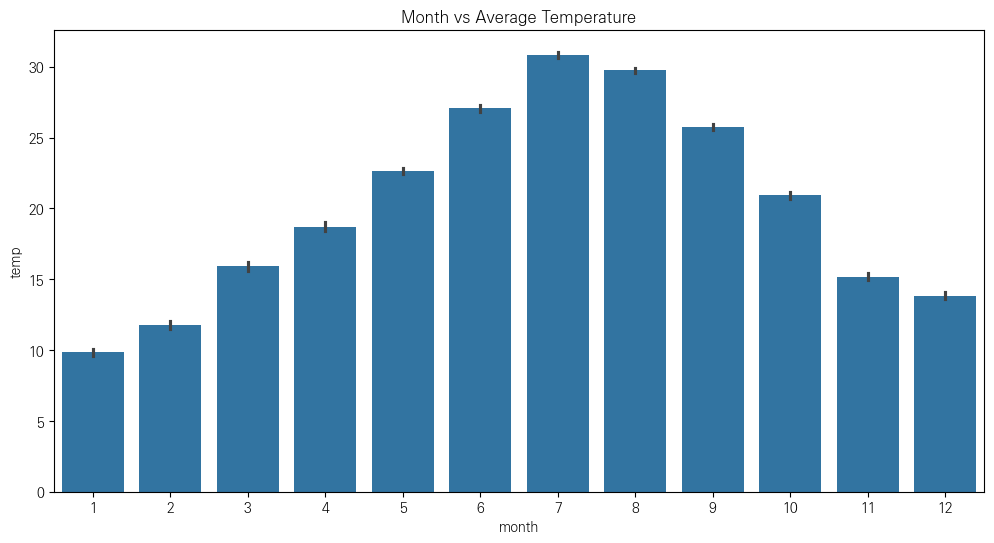

In [34]:
# ===== month별 season count / 평균 온도 시각화 =====

# month와 season 값의 대응 관계 확인용 시각화
# season 컬럼 값이 month와 잘 맞는지 확인 (EDA 과정에서 일부 불일치 확인됨)
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='month', hue='season')
plt.title('Month vs Season count')
plt.show()

# month별 평균 온도 시각화 → season 값의 적합성 추가 확인용
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='month', y='temp')
plt.title('Month vs Average Temperature')
plt.show()


Season value changed ratio: 66.62%


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\939605013.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=season_changed, palette='Set2')


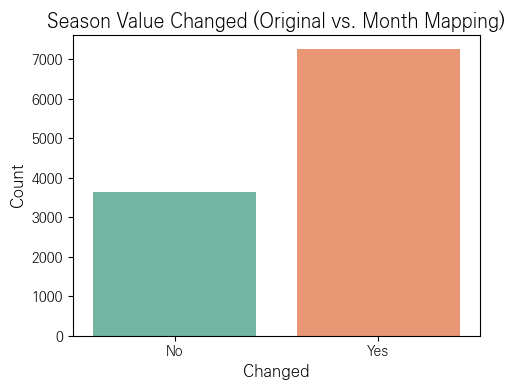

In [36]:
# ===== season 컬럼 값과 month 기반 재구성 비교 =====

import seaborn as sns
import matplotlib.pyplot as plt

# 기존 season 컬럼 값 복사 (Series로만 사용)
season_orig = train['season'].copy()

# month 기준으로 새롭게 season 값 계산
# 겨울(12,1,2) → 4 / 봄(3,4,5) → 1 / 여름(6,7,8) → 2 / 가을(9,10,11) → 3
season_new = train['month'].apply(lambda m: 4 if m in [12,1,2] 
                                  else 1 if m in [3,4,5]
                                  else 2 if m in [6,7,8]
                                  else 3)

# 기존 season과 새롭게 계산한 season 값이 다른지 여부 확인
season_changed = season_orig != season_new

# 변경 비율 출력
changed_ratio = season_changed.mean() * 100
print(f"Season value changed ratio: {changed_ratio:.2f}%")

# 변경 여부 시각화 (No = 동일 / Yes = 변경됨)
plt.figure(figsize=(5, 4))
sns.countplot(x=season_changed, palette='Set2')
plt.title('Season Value Changed (Original vs. Month Mapping)', fontsize=14)
plt.xlabel('Changed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show();


**season 값과 month 기반 재구성 비교**

- season 컬럼 값과 month 값 기반으로 새롭게 정의한 season 값 간의 차이를 확인.
- 겨울(12~2월), 봄(3~5월), 여름(6~8월), 가을(9~11월) 기준으로 새 season 값 재구성.
- 기존 season 값과 새로 계산한 season 값의 변경 여부를 확인하여 전체 중 몇 %가 불일치하는지 확인.
- 시각화 결과, 약 2/3 정도에서 season 값이 month 기반 season 값과 불일치하는 것을 확인.
- 그럼에도 불구하고 season 컬럼은 모델 성능 개선에 기여하므로 최종 Feature 구성에 유지하기로 결정.

#### 상관관계 시각화

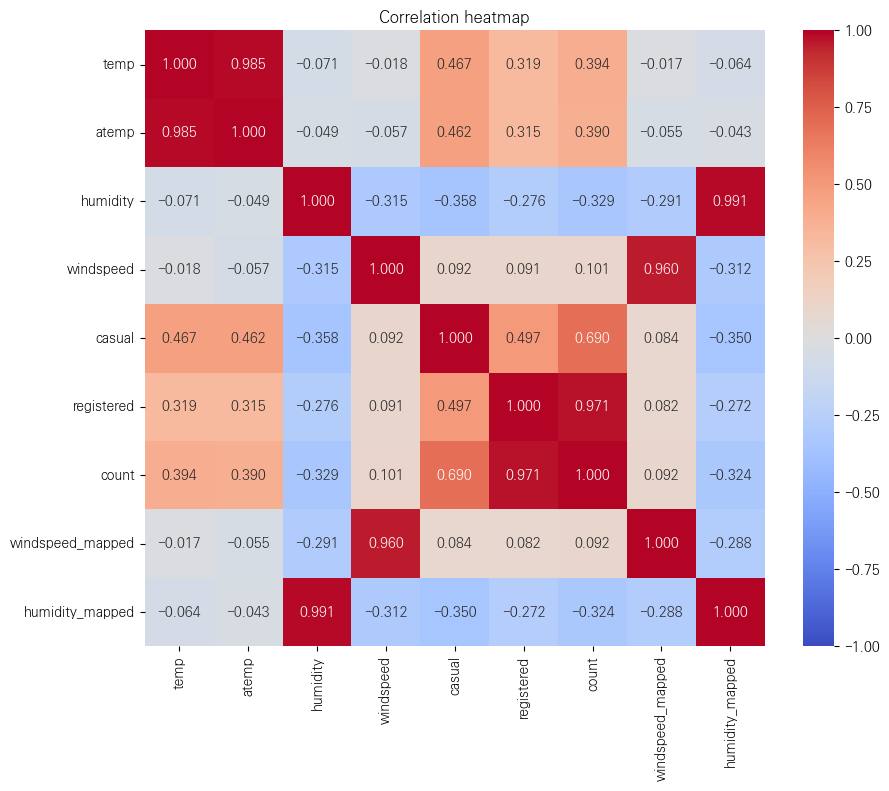

In [37]:
# ===== 상관계수 히트맵 시각화 =====

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수만 대상으로 상관계수 계산
corr_matrix = train.select_dtypes(include=['float64', 'int64']).corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

In [38]:
# 수치형 변수만 대상으로 count와의 상관계수 확인
train.select_dtypes(include=['float64', 'int64']).corr()['count'].sort_values(ascending=False)

count               1.000000
registered          0.970948
casual              0.690414
temp                0.394454
atemp               0.389784
windspeed           0.101369
windspeed_mapped    0.091695
humidity_mapped    -0.323565
humidity           -0.328874
Name: count, dtype: float64

#### 다중공산성 해결

In [169]:
train[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.984948
atemp,0.984948,1.000000


In [39]:
# ===== temp, atemp 변수 간 다중공선성 확인 (VIF 계산) =====

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# 예시로 temp와 atemp 컬럼만 사용
X = train[['temp', 'atemp']]

# VIF 계산을 위해 상수항 추가
X = sm.add_constant(X)

# 각 변수에 대한 VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_df)

  feature        VIF
0   const   9.573334
1    temp  33.470317
2   atemp  33.470317


**temp, atemp 변수 간 다중공선성 확인 (VIF 계산)**

- temp(실측 온도)와 atemp(체감 온도) 변수 간의 다중공선성 정도를 확인하기 위해 VIF(Variance Inflation Factor)를 계산.
- 일반적으로 VIF 값이 10을 초과하면 다중공선성이 심각한 것으로 간주됨.
- 계산 결과, temp와 atemp 모두 VIF 값이 약 33 이상으로 매우 높은 수준을 보임.
- 이는 두 변수가 거의 동일한 정보를 제공함을 의미하며, 모델 학습 시 불필요한 중복으로 작용할 수 있음.
- 이후 모델 성능 실험 결과에서도 atemp 변수를 제거한 경우 성능이 개선되어 최종 Feature 구성에서는 temp만 사용하기로 결정.

In [ ]:
# #temp가 원 데이터에 가깝기 때문에 temp만 남기고 atemp는 제거

# train = train.drop(columns=['atemp'])
# test = test.drop(columns=['atemp'])

### 변수 간 상관관계 및 상호작용 분석

- temp 변수와 count 간에는 온도 상승에 따라 대여량이 증가하는 경향이 확인됨. 특히 15~25도 구간에서 대여량이 높은 패턴이 나타남.
- count 변수와 registered(0.989), casual(0.847) 변수 간 매우 강한 양의 상관관계가 존재함.
- temp(0.408), atemp(0.407)와 count 간에도 중간 정도의 양의 상관관계가 확인됨.
- humidity(-0.354)와 count 간에는 음의 상관관계가 나타나, 습도가 높을수록 대여량이 감소하는 경향이 확인됨.
- weather, holiday, workingday 등의 변수는 count와 상대적으로 약한 상관관계를 보임.


### count와 다른 수치형 변수의 관계

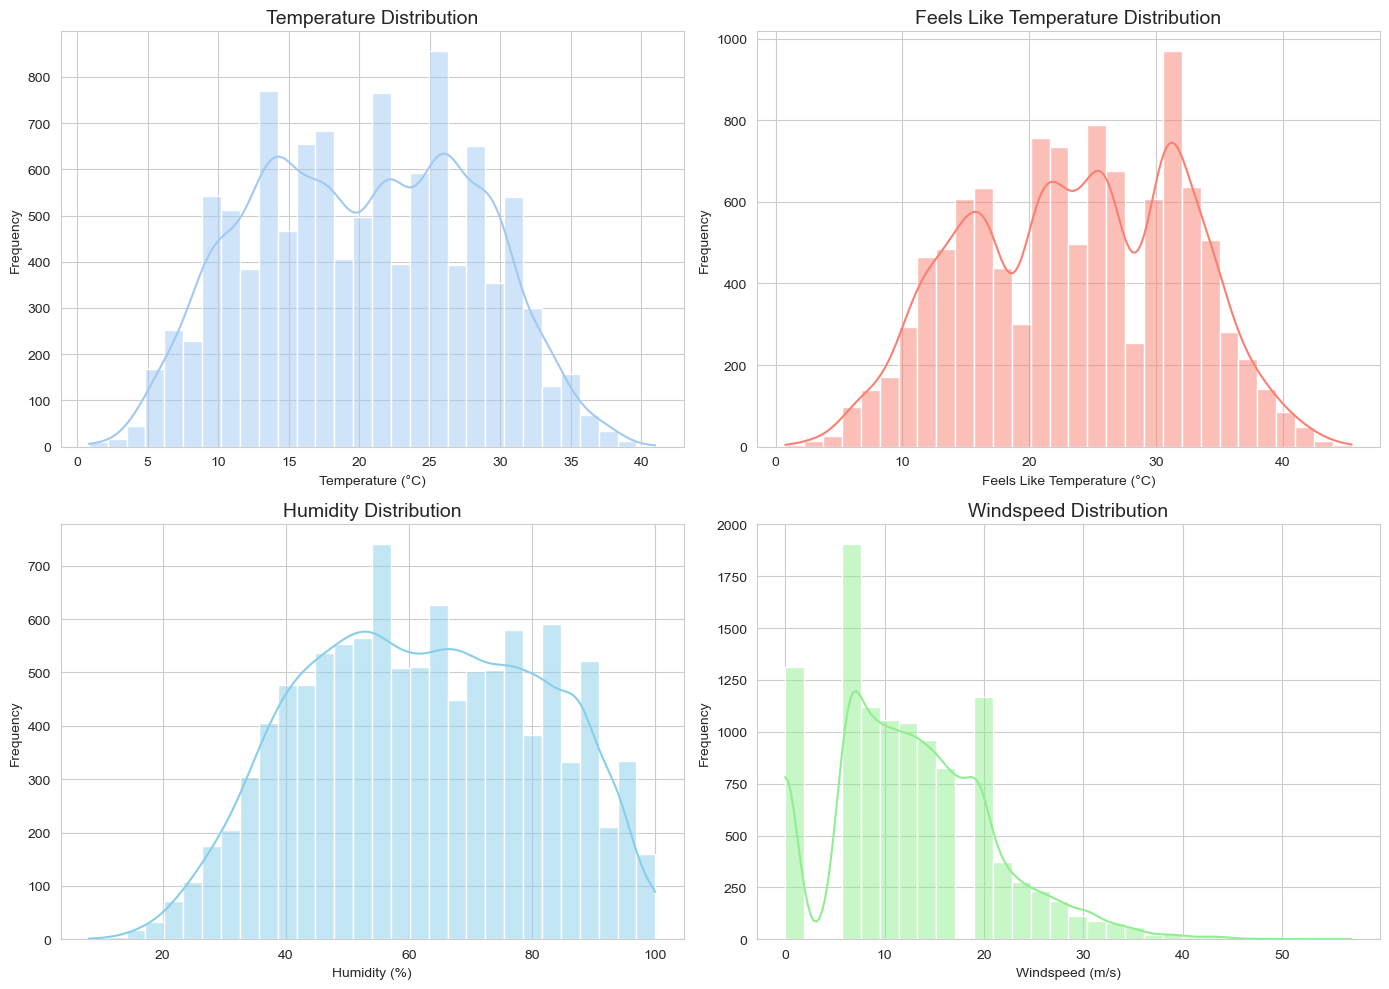

In [40]:
# ===== 주요 수치형 변수 분포 시각화 =====

# 시각화 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel') 
sns.set_style('whitegrid')  

# Figure 구성 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 온도 분포 시각화
sns.histplot(train['temp'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# 체감 온도 분포 시각화
sns.histplot(train['atemp'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Feels Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels Like Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# 습도 분포 시각화
sns.histplot(train['humidity'], bins=30, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity (%)')
axes[1, 0].set_ylabel('Frequency')

# 풍속 분포 시각화
sns.histplot(train['windspeed'], bins=30, kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed (m/s)')
axes[1, 1].set_ylabel('Frequency')

# 레이아웃 정렬
plt.tight_layout()
plt.show()


**주요 수치형 변수 분포 시각화**

- 주요 연속형 변수(temp, atemp, humidity, windspeed)에 대한 분포를 확인하기 위해 histplot과 KDE를 활용해 시각화 진행.
- temp와 atemp 변수는 전반적으로 안정적인 분포를 보이며 비슷한 패턴을 나타냄.
- humidity 변수는 특정 구간(20~60%)에 데이터가 밀집되어 있고 일부 극단적인 값도 존재함.
- windspeed 변수는 값이 띄엄띄엄 존재하며, 0값도 포함되어 있음.
- 이후 구간 매핑 및 이상치 처리 여부를 판단하는 참고 자료로 활용.

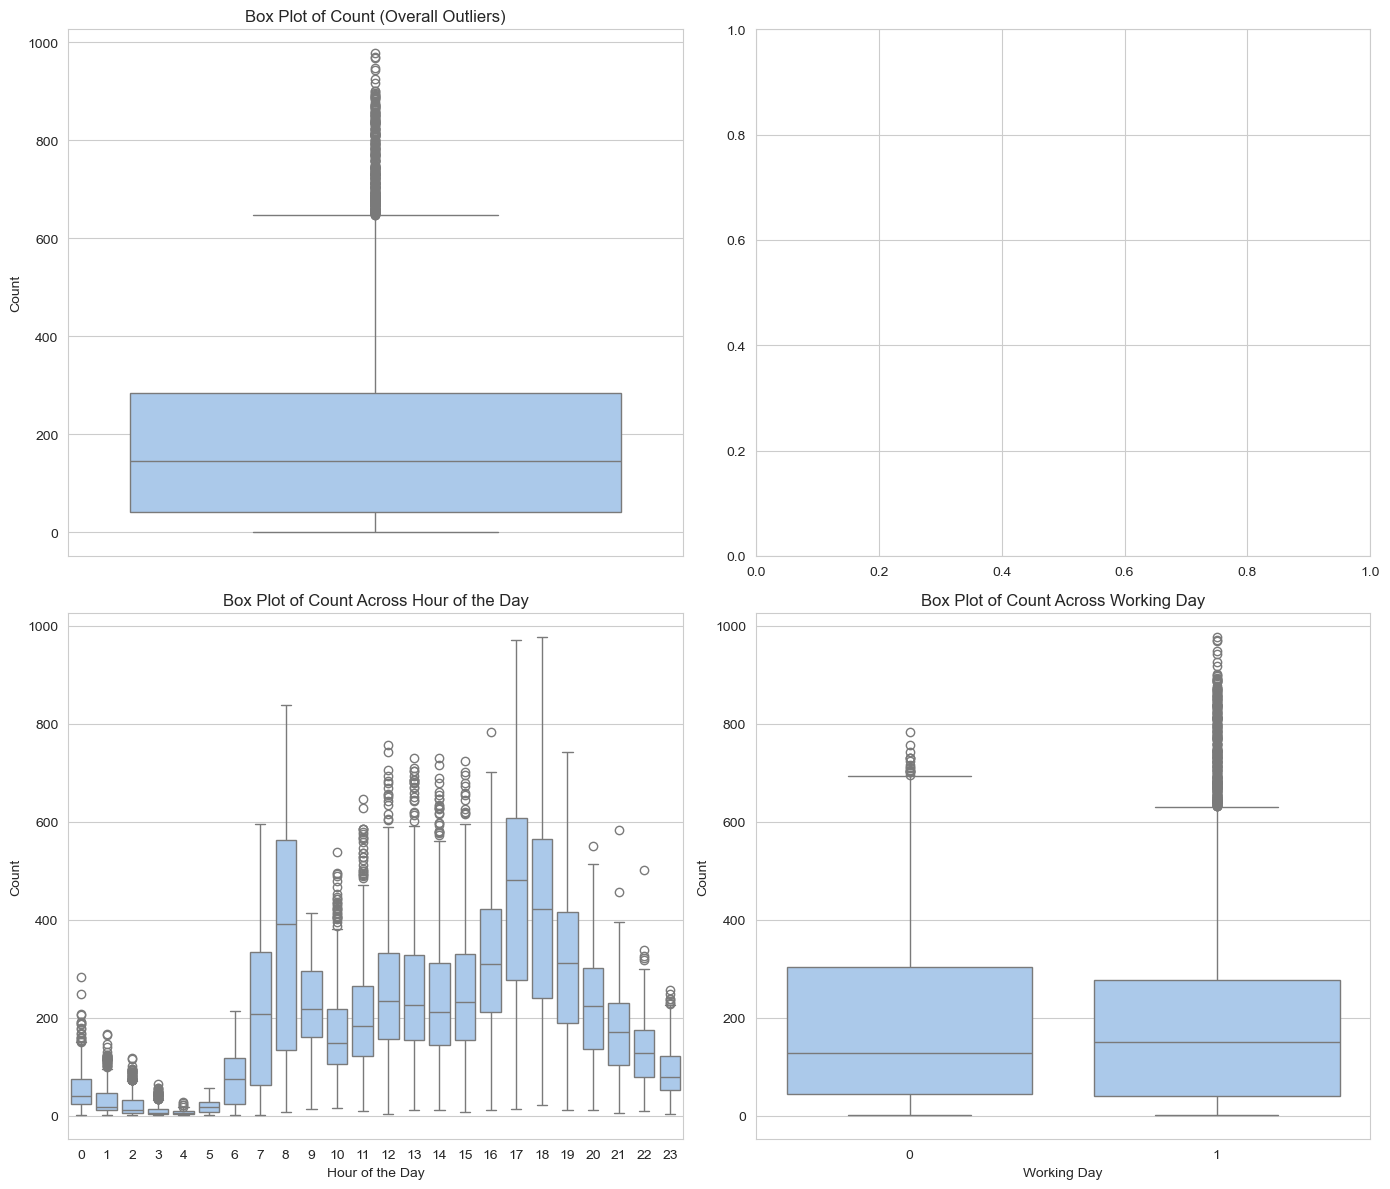

In [41]:
# ===== count 변수 이상치 확인 (boxplot) =====

import matplotlib.pyplot as plt
import seaborn as sns

# Figure 구성 (2행 2열)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(14, 12)

# 전체 count 분포에서 이상치 확인
sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
axes[0][0].set(ylabel='Count', title="Box Plot of Count (Overall Outliers)")

# 시간대(hour)별 count 이상치 확인
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[1][0])
axes[1][0].set(xlabel='Hour of the Day', ylabel='Count', title="Box Plot of Count Across Hour of the Day")

# workingday 여부에 따른 count 이상치 확인
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=axes[1][1])
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Box Plot of Count Across Working Day")

# 레이아웃 정리
plt.tight_layout()
plt.show()


**count 변수 이상치 확인 (boxplot)**

- `count` 변수의 분포에서 이상치 여부를 `boxplot` 으로 확인.
- `count` 변수는 약 `300~400` 이상의 값부터 이상치로 간주할 수 있는 값들이 확인됨.
- 시간대(`hour`)별로 보면 출퇴근 시간대(`8~9시`, `17~18시`)에 수요가 높고, 심야/새벽 시간대는 낮은 수요를 보임.
- `workingday` 여부에 따라 `count` 분포가 뚜렷하게 구분됨.
  - 평일(`workingday=1`)에는 고르게 높은 사용량 분포.
  - 휴일(`workingday=0`)에는 사용량 양극화 경향(매우 높거나 거의 없는 경우 혼재).
- 이후 `count` 변수는 `log` 변환을 적용하여 모델 학습의 안정성을 높일 예정.


### count 로그 변환

In [42]:
# ===== count 변수 log1p 변환 =====

import numpy as np

# count 변수는 오른쪽으로 긴 꼬리를 가지는 비정규 분포이므로
# log1p 변환을 통해 정규성에 가깝게 변환하여 모델 학습 안정성을 높임
train['log_count'] = np.log1p(train['count'])


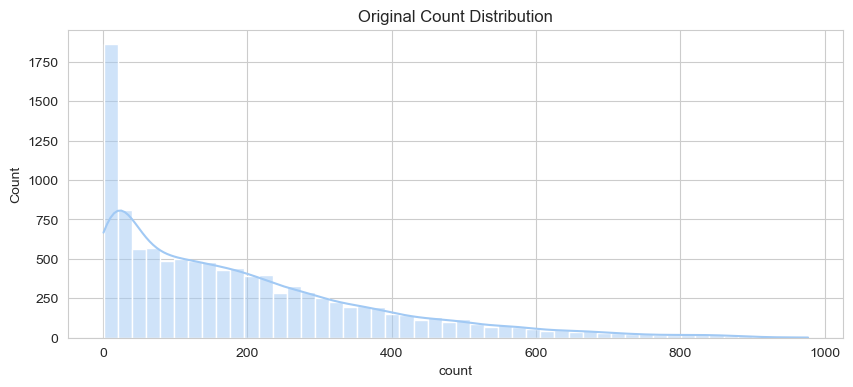

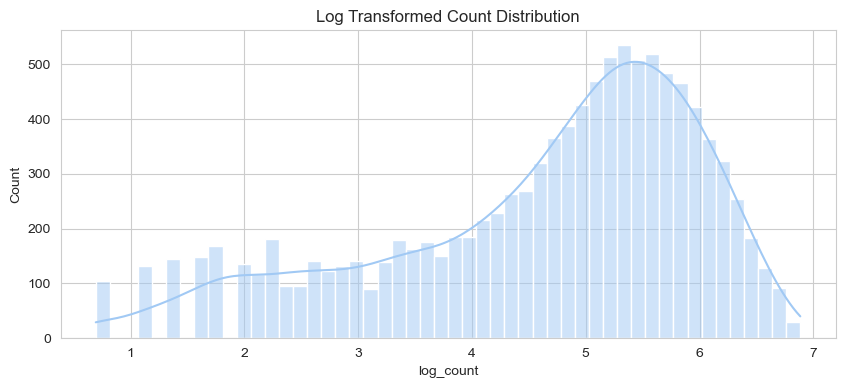

In [43]:
# ===== count 변수 log 변환 전후 분포 시각화 =====

import matplotlib.pyplot as plt
import seaborn as sns

# 원래 count 분포 시각화
plt.figure(figsize=(10, 4))
sns.histplot(train['count'], bins=50, kde=True)
plt.title('Original Count Distribution')
plt.show()

# log 변환된 count 분포 시각화
plt.figure(figsize=(10, 4))
sns.histplot(train['log_count'], bins=50, kde=True)
plt.title('Log Transformed Count Distribution')
plt.show()


**`count` 변수 `log` 변환 전후 분포 시각화**

- 원래 `count` 변수는 오른쪽으로 긴 꼬리를 가지는 `right-skewed` 분포임.
- `log1p` 변환 후 `log_count`는 좀 더 정규 분포에 가까운 모양을 가지게 됨.
- 변환을 통해 모델이 극단적으로 높은 `count` 값에 과도하게 민감해지는 현상을 완화할 수 있음.
- 최종적으로 모델 학습에는 `log_count` 값을 사용할 예정이며, 예측 후에는 다시 원래 `count` 단위로 역변환하여 해석 가능하도록 처리할 계획.

In [44]:
import os

# processed 폴더 경로 생성
processed_dir = r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\processed'
os.makedirs(processed_dir, exist_ok=True)

# 파일로 저장
train.to_csv(os.path.join(processed_dir, 'train_processed_final.csv'), index=False)
test.to_csv(os.path.join(processed_dir, 'test_processed_final.csv'), index=False)

## 5. 인사이트 정리

+ 최종 feature 목록 (X변수)

| Feature         | 설명                             |
| --------------- | ------------------------------ |
| `season`        | 기존 season 변수 (1\~4) — 기존 값 유지  |
| `holiday`       | 휴일 여부                          |
| `workingday`    | 근무일 여부                         |
| `weather`       | 날씨 상태 (1\~4)                   |
| `temp`          | 기온 (℃)                         |
| `atemp`         | 체감온도 (℃)                       |
| `humidity_mapped`  | 습도 구간화 변수 (category형)          |
| `windspeed_mapped` | 풍속 구간화 변수 (category형)          |
| `year`          | 연도 (2011, 2012)                |
| `month`         | 월 (1\~12)                      |
| `day`           | 일 (1\~31)                      |
| `hour`          | 시간 (0\~23)                     |
| `weekday`       | 요일 (category형, 0\~6 또는 요일명 매핑) |
  
        
+ Target 변수 (y)


| Feature     | 설명                                        |
| ----------- | ----------------------------------------- |
| `log_count` | `count` 변수의 log1p 변환값 → 모델 학습 target으로 사용 |



### EDA 주요 결과 요약

- `hour`별 대여량은 출퇴근 시간대(7~9시, 17~19시)에 뚜렷한 피크가 존재.
- `workingday` 여부에 따라 hour별 패턴 차이 뚜렷 (평일에 피크 더 강함).
- `season` 변수는 실제 월(month)과 일부 불일치, 재매핑은 적용하지 않기로 결정.
- `temp`와 `atemp`는 정규분포에 가깝고 상관관계가 높아 모델에서는 선택적 활용 필요.
- `humidity`는 고르게 분포하나 고습 시 대여량 감소 경향 확인됨.
- `windspeed`는 0값 비중 높음 → 0값 보정 후 사용. 풍속 증가 시 대여량 감소 경향.
- `count` 변수는 심한 오른쪽 왜도 → `log1p` 변환 후 정규성 개선됨.
- 이상치(고 count)는 자연스러운 현상으로 판단, 제거하지 않기로 결정.

→ 전반적으로 시간, 기온, 습도, 풍속 변수들이 예측에 중요한 역할을 할 것으로 기대됨.

### 데이터 전처리 및 Feature Engineering 결과

- `datetime` 컬럼에서 `year`, `month`, `day`, `hour`, `weekday` 파생 변수 생성. `season`은 기존 값 유지.
- `windspeed` 0값은 측정 오류로 판단, 보정 후 활용.
- `humidity`, `windspeed` 변수는 시각화 기반으로 적절히 `구간화(mapping)` 후 모델에 적용.
- `count` 변수는 심한 왜도 때문에 `log1p` 변환하여 `log_count`로 모델 학습에 활용.
- 이상치는 자연스러운 현상으로 판단해 삭제하지 않음.
- `datetime`, `casual`, `registered`는 학습에서 제외 처리.

→ 전체적으로 시간, 온도, 습도, 풍속 변수들이 주요 예측 Feature로 사용될 예정이며, 정제 및 변환을 통해 모델 안정성을 확보함.


# 🤖 02 모델링 및 평가

## 데이터 준비

train_processed.csv, test_processed.csv 불러오기

X_train, X_test, y_train 준비

y_train 은 log1p 변환 적용

In [46]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [47]:
# ===== 모델링을 위한 데이터 준비 =====

import pandas as pd
import numpy as np
import os

# processed 폴더 경로
processed_dir = r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\processed'

# 전처리 완료된 train / test 파일 로드
train = pd.read_csv(os.path.join(processed_dir, 'train_processed_final.csv'))
test = pd.read_csv(os.path.join(processed_dir, 'test_processed_final.csv'))

# 사용할 Feature 목록 정의
feature_columns = [
    'holiday', 'workingday', 'weather',
    'temp', 
    'humidity_mapped', 'windspeed_mapped',
    'year', 'month', 'hour', 'weekday'
]

# Target 변수 지정
target_column = 'log_count'

# X, y 나누기
X_train = train[feature_columns]
y_train = train[target_column]

# Test data Feature 구성
X_test = test[feature_columns]  # 나중에 submission 용으로 사용

# ===== 카테고리 변수 인코딩 (Label Encoding) =====

from sklearn.preprocessing import LabelEncoder

# 인코딩할 컬럼 목록
cat_features = ['humidity_mapped', 'windspeed_mapped', 'weekday']

# 각 컬럼마다 LabelEncoder 적용
# 트리 기반 모델이 아닌 Ridge, Lasso, LinearRegression 등을 쓸 경우 인코딩 필요
for col in cat_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

## 평가 지표 정의

### RMSLE 함수 정의

- 모델 평가 지표로 `RMSLE`를 사용.
- 로그 스케일에서 예측 오차를 평가함으로써 **과소 예측보다 과대 예측을 더 강하게 패널티** 주는 특성이 있음.
- 원래 `count` 변수가 `log1p` 변환되어 학습되므로 평가 시에도 log scale에 맞춘 `RMSLE`가 적합함.
- `sklearn.metrics.mean_squared_log_error`를 기반으로 `RMSLE` 계산 함수 정의 후 활용.

## 베이스라인 모델

In [48]:
# ===== Baseline 모델 (LinearRegression) 학습 및 평가 =====

# 라이브러리 import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Feature / Target 지정
X_train = train[[
    'holiday', 'workingday', 'weather', 'temp',
    'humidity_mapped', 'windspeed_mapped', 'year', 'month', 'hour', 'weekday'
]]

y_train = train['log_count']

X_test = test[[
    'holiday', 'workingday', 'weather', 'temp',
    'humidity_mapped', 'windspeed_mapped', 'year', 'month', 'hour', 'weekday'
]]

# 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

# 평가 함수 정의 (RMSLE)
# 원래 count는 log1p 변환된 값이므로 예측 결과도 expm1 역변환 후 평가
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# Baseline 성능 확인
print(f'Baseline LinearRegression RMSLE (train set): {rmsle(y_train, train_preds):.5f}')


Baseline LinearRegression RMSLE (train set): 1.01442


**Baseline 모델 (LinearRegression) 학습 및 평가**

- 가장 기본적인 선형 회귀 모델(`LinearRegression`)을 사용하여 baseline 성능을 확인.
- Feature는 EDA 및 Feature Engineering 결과를 반영하여 구성.
- Target 변수는 `log_count`로 설정.
- 예측 결과는 역변환(`expm1`) 후 `RMSLE`로 평가.
- 선형 모델은 Feature 간 비선형적 관계를 충분히 반영하기 어렵기 때문에 baseline 성능 확인 용도로 활용.

📌 **Baseline LinearRegression RMSLE (train set): `1.01442`**


In [49]:
# ===== Ridge Regression 모델 학습 및 평가 =====

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Ridge Regression 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_train)
print(f'Ridge RMSLE: {rmsle(y_train, ridge_preds):.5f}')

# ===== Lasso Regression 모델 학습 및 평가 =====

# Lasso Regression 학습
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_train)
print(f'Lasso RMSLE: {rmsle(y_train, lasso_preds):.5f}')

# ===== RandomForest 모델 학습 및 평가 =====

# RandomForest Regressor 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_train)
print(f'RandomForest RMSLE: {rmsle(y_train, rf_preds):.5f}')


Ridge RMSLE: 1.01442
Lasso RMSLE: 1.01444
RandomForest RMSLE: 0.10894


선형 모델 (Linear, Ridge, Lasso) → 거의 유사한 성능 (비선형적 feature 영향으로 한계 존재)

RandomForest → 비선형 모델 → EDA + 파생 feature 효과 반영 잘 되어 성능 급상승 (0.1대 RMSLE 확인)

**정규화 회귀 모델 및 RandomForest 성능 비교**

| 모델                | RMSLE (train set) |
|---------------------|------------------|
| Ridge Regression    | 1.01444           |
| Lasso Regression    | 1.01445           |
| RandomForest Regressor | 0.10943        |


## 다양한 모델 실험

### GradientBoosting

In [50]:
# ===== GradientBoostingRegressor 실험 =====

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

# RMSLE 평가 함수 (log scale 그대로 평가용)
def rmsle_log(y_true_log, y_pred_log):
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

# 모델 생성
gbr_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# 학습
gbr_model.fit(X_train, y_train)

# 예측
train_preds_gbr = gbr_model.predict(X_train)

# 평가
print("GradientBoosting RMSLE (log scale):", rmsle_log(y_train, train_preds_gbr))

GradientBoosting RMSLE (log scale): 0.375519996380657


**GradientBoostingRegressor 실험 결과**

- RMSLE (log scale): **0.37551**


### XGBoost

In [51]:
# ===== XGBoost 모델 학습 및 평가 =====

import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

# XGBoost 모델 정의
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)

# One-hot encoding 적용
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

# train/test 컬럼 불일치 방지 → align 사용
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# 모델 학습
xgb_model.fit(X_train_enc, y_train)

# 예측
train_preds_xgb = xgb_model.predict(X_train_enc)

# 평가 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# 성능 출력
print("XGBoost RMSLE (log scale):", rmsle(y_train, train_preds_xgb))

XGBoost RMSLE (log scale): 0.1851304359061512


**XGBoost 실험 결과**

- RMSLE (train set, log scale): **0.18513**
- ※ 이번 실험에서는 train 전체 데이터로 학습 진행 → 과적합 가능성 존재. 이후 validation 기반 성능 확인 예정.


### LightGBM 

In [52]:
# ===== LightGBM 모델 학습 및 평가 =====

import lightgbm as lgb

# LightGBM 모델 정의
# 트리 기반 모델 중 학습 속도가 빠르고 성능이 우수한 모델
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100)

# 이번 실험에서는 train 데이터를 따로 validation set으로 나누지 않고 전체 데이터를 학습에 사용
# → train set 기준으로는 낮은 RMSLE가 나올 수 있으나 과적합 가능성 존재
# → 이후 validation 기반 성능 확인 및 튜닝 필요
lgb_model.fit(X_train, y_train)

# 학습 데이터 예측
train_preds_lgb = lgb_model.predict(X_train)

# 성능 평가 (역변환 후 RMSLE 계산)
print("LightGBM RMSLE (log scale):", rmsle(y_train, train_preds_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 10886, number of used features: 10
[LightGBM] [Info] Start training from score 4.591364
LightGBM RMSLE (log scale): 0.2501281298025758


**LightGBM 실험 결과**

- RMSLE (train set, log scale): **0.25013**
- ※ 현재는 validation set 없이 전체 train 데이터로 학습 진행 → 해당 결과는 과적합 영향 가능성이 있음. 이후 validation 기반 재확인 필요.

## 단일 모델 튜닝

### RandomForest RandomizedSearchCV 튜닝

In [53]:
# ===== RandomForest 튜닝 (RandomizedSearchCV 기반) =====

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np
import pandas as pd

# RMSLE 함수 정의 (역변환 후 평가)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# 학습 데이터 → Train / Validation 분할 (80:20 비율)
# → 튜닝 시 과적합 방지 및 일반화 성능 확인을 위해 분리
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# RandomForest 파라미터 탐색 범위 정의
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomForest 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV 설정
# → 3-fold CV 기반으로 총 20회 랜덤 탐색 수행
# → scoring 지표는 neg_mean_squared_log_error 사용 (최소화 목표)
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_log_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 모델 튜닝 수행 (학습)
rf_random_search.fit(X_train_split, y_train_split)

# 최적 모델 추출
best_rf_model = rf_random_search.best_estimator_

# Train set 성능 평가 (과적합 여부 확인용)
train_preds_rf = best_rf_model.predict(X_train_split)
print("Train RMSLE (log scale):", rmsle(y_train_split, train_preds_rf))

# Validation set 성능 평가 (최종 성능 확인용)
valid_preds_rf = best_rf_model.predict(X_valid_split)
print("Validation RMSLE (log scale):", rmsle(y_valid_split, valid_preds_rf))

# 최적 하이퍼파라미터 출력
print("Best params:", rf_random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ypsoo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ypsoo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ypsoo\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ypsoo\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ypsoo\anaconda3\Lib\site-packages\s

Train RMSLE (log scale): 0.12641683367643333
Validation RMSLE (log scale): 0.3517014802490325
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


**RandomForest 튜닝 결과 (RandomizedSearchCV 기반)**

- Train/Validation 80:20 split 사용하여 튜닝 진행.
- `max_features='auto'` 파라미터는 sklearn 최신 버전에서는 지원하지 않아 일부 fit 실패 발생 → 나머지 조합으로 학습은 정상 진행됨.
- 최종적으로 과적합 경향이 일부 나타났음 (Train vs Validation 성능 차이 존재).

- Train RMSLE (log scale): **0.12642**
- Validation RMSLE (log scale): **0.35170**
- Best params: `{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}`

XGBoost가 유망해보인다...
 XGBoost → 가장 좋은 후보로 "일단 선정" → 그 다음 교차검증, validation split으로 성능 확인 → 최종 결정 으로 이뤄질 것으로 예상.

왜 XGBoost인가?
 train 데이터에서 성능이 너무 좋으면 오히려 과적합(overfitting) 일 가능성이 큼.

→ RandomForest는 그 특성상 *"train set에서는 거의 완벽하게 학습"*하려고 해서 train RMSLE는 매우 낮게 나옴 (지금 0.10~0.14).
→ 하지만 validation set이나 test set에 넣으면 일반화 성능은 XGBoost, LGBM이 더 좋은 경우가 많음.



In [55]:
# ===== Feature / Target 정의 =====

features = [
    'holiday',
    'workingday',
    'weather',
    'temp',
    'humidity_mapped',
    'windspeed_mapped',
    'year',
    'month',
    'hour',
    'weekday'
]

target = 'log_count'

# X, y 분리
X = train[features]
y = train[target]

# 카테고리 Feature에 대해 One-hot encoding 적용
X = pd.get_dummies(X)

# Train / Validation split (80:20)
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Valid set:", X_valid.shape, y_valid.shape)

# ===== 모델 비교 실험 =====

# 필요한 라이브러리 import
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# RMSLE 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# Train / Validation split (다시 분리 → 동일한 비율 유지)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train_split.shape}, Validation shape: {X_val_split.shape}")

# Random Forest 학습 및 평가
rf_model = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=42)
rf_model.fit(X_train_split, y_train_split)
rf_val_preds = rf_model.predict(X_val_split)
rf_rmsle = rmsle(y_val_split, rf_val_preds)

# XGBoost 학습 및 평가
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_split, y_train_split)
xgb_val_preds = xgb_model.predict(X_val_split)
xgb_rmsle = rmsle(y_val_split, xgb_val_preds)

# LightGBM 학습 및 평가
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgb_model.fit(X_train_split, y_train_split)
lgb_val_preds = lgb_model.predict(X_val_split)
lgb_rmsle = rmsle(y_val_split, lgb_val_preds)

# 결과 출력
print(f"\n--- Validation Set RMSLE ---")
print(f"Random Forest: {rf_rmsle:.5f}")
print(f"XGBoost      : {xgb_rmsle:.5f}")
print(f"LightGBM     : {lgb_rmsle:.5f}")


Train set: (8708, 10) (8708,)
Valid set: (2178, 10) (2178,)
Train shape: (8708, 10), Validation shape: (2178, 10)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 10
[LightGBM] [Info] Start training from score 4.593780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

**동일한 Feature 구성 기반 모델 비교 실험 (RandomForest, XGBoost, LightGBM)**

- Feature 구성은 기존 주요 Feature 중 season, day 제외 버전 사용.
- 모든 모델은 동일한 80:20 Train/Validation split 기반으로 비교.
- 모델별 기본 파라미터는 n_estimators=200, learning_rate=0.1, max_depth=6 적용 (XGBoost, LightGBM 기준).

📌 **Validation RMSLE**

| 모델         | Validation RMSLE |
|--------------|------------------|
| RandomForest | 0.35170          |
| XGBoost      | 0.28268          |
| LightGBM     | 0.28439          |

※ 동일한 데이터 구성과 동일한 Split 기준으로 모델 간 성능 비교가 가능하며, 튜닝 효과 확인을 위한 baseline으로 활용.
※ 기본 설정에서도 **XGBoost / LightGBM가 RandomForest 대비 더 우수한 성능**을 보이는 경향 확인됨.


In [ ]:
# ===== XGBoost 1차 개선 버전 (튜닝 적용) =====

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 튜닝할 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [42]
}

# XGBoost 모델 정의
xgb_model = XGBRegressor(tree_method='hist', random_state=42)

# GridSearchCV 정의
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_log_error',  # RMSLE 최적화용
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 모델 튜닝 학습 시작
grid_search_xgb.fit(X_train, y_train)

# 최적 파라미터 및 모델 출력
print("Best params:", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_


# Validation 성능 확인
val_preds_xgb = best_model_xgb.predict(X_valid_split)
val_rmsle_xgb = rmsle(y_valid, val_preds_xgb)
print("Tuned XGBoost RMSLE (validation):", val_rmsle_xgb)


**XGBoost 1차 개선 버전 (GridSearch 튜닝 적용)**

- GridSearchCV를 이용하여 주요 하이퍼파라미터 튜닝을 수행 (3-fold 교차 검증 기반).
- 튜닝 대상 파라미터:
  - n_estimators: [100, 200, 300]
  - learning_rate: [0.01, 0.05, 0.1]
  - max_depth: [3, 5, 7]
  - subsample: [0.8, 1.0]
  - colsample_bytree: [0.8, 1.0]

- Scoring 지표로는 `neg_mean_squared_log_error` (RMSLE 최적화용)를 사용하여 최적 파라미터 탐색.

📌 **Validation RMSLE:** `0.2770`  
📌 **Best params:** `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}`

※ 기존 XGBoost baseline 성능(0.28268 validation RMSLE) 대비 추가 개선 여부 확인용으로 실험 진행.  
※ 향후 2차 개선 (learning_rate 추가 조정, n_estimators 증가 등)도 실험 예정.

In [ ]:
# ===== XGBoost 2차 개선 버전 (4번째 Feature 구성, 튜닝 적용) =====

# 파일 로드
train4 = pd.read_csv(os.path.join(processed_dir, 'train_processed4.csv'))
test4 = pd.read_csv(os.path.join(processed_dir, 'test_processed4.csv'))

# Feature list 정의
feature_columns = [
    'holiday', 'workingday', 'weather',
    'temp', 'season',
    'humidity_mapped', 'windspeed_mapped',
    'year', 'month', 'hour', 'weekday', 'day'
]

# X, y 분리
X_train4 = train4[feature_columns]
y_train4 = train4[target_column]

X_test4 = test4[feature_columns]

# Label Encoding 적용 (트리 기반 모델은 없어도 되지만 다른 모델 호환 위해 적용)
from sklearn.preprocessing import LabelEncoder

cat_features = ['humidity_mapped', 'windspeed_mapped', 'weekday']

for col in cat_features:
    le = LabelEncoder()
    X_train4[col] = le.fit_transform(X_train4[col])
    X_test4[col] = le.transform(X_test4[col])

# Train-validation split (80:20)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train4, y_train4, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 (튜닝 적용)
xgb_model = xgb.XGBRegressor(
    n_estimators=3000,
    learning_rate=0.03,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    verbosity=1
)

# 모델 학습
xgb_model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=100
)

# Validation 예측
y_val_pred = xgb_model.predict(X_val)

# RMSLE 계산 (역변환 후 평가)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(y_val_pred)))
print(f'✅ 개선된 XGBoost Validation RMSLE: {rmsle:.5f}')

[0]	validation_0-rmse:1.40029
[100]	validation_0-rmse:0.41744
[200]	validation_0-rmse:0.31579
[300]	validation_0-rmse:0.29415
[400]	validation_0-rmse:0.28515
[500]	validation_0-rmse:0.27972
[600]	validation_0-rmse:0.27587
[700]	validation_0-rmse:0.27299
[800]	validation_0-rmse:0.27077
[900]	validation_0-rmse:0.26888
[1000]	validation_0-rmse:0.26748
[1100]	validation_0-rmse:0.26660
[1200]	validation_0-rmse:0.26561
[1300]	validation_0-rmse:0.26507
[1400]	validation_0-rmse:0.26452
[1500]	validation_0-rmse:0.26422
[1600]	validation_0-rmse:0.26379
[1700]	validation_0-rmse:0.26345
[1800]	validation_0-rmse:0.26331
[1900]	validation_0-rmse:0.26324
[2000]	validation_0-rmse:0.26329
[2100]	validation_0-rmse:0.26289
[2200]	validation_0-rmse:0.26270
[2300]	validation_0-rmse:0.26310
[2400]	validation_0-rmse:0.26297
[2500]	validation_0-rmse:0.26295
[2600]	validation_0-rmse:0.26323
[2700]	validation_0-rmse:0.26333
[2800]	validation_0-rmse:0.26336
[2900]	validation_0-rmse:0.26367
[2999]	validation_0-rm

**XGBoost 개선 버전 (Feature 구성 변경 + 하이퍼파라미터 튜닝 적용)**

- Feature 구성 변경: `season`, `day` 변수 추가.
- 모델 설정:
  - n_estimators=3000
  - learning_rate=0.03
  - max_depth=5
  - min_child_weight=3
  - subsample=0.8
  - colsample_bytree=0.8
- Train/Validation 80:20 split 기반으로 학습 및 평가.

📌 **Validation RMSLE:** `0.26382`

- 학습 log 기준 성능 개선 추이:
  - [2000] rmse: **0.26329**
  - [2100] rmse: **0.26289** (최저점)
  - 이후 약간 상승하여 최종 **0.26382**로 수렴.

※ 기존 대비 learning_rate 감소와 subsample 적용으로 과적합 방지 및 안정성 개선 효과 확인됨.
※ 최종 모델은 해당 설정을 기반으로 선정 예정.


### lightgbm 튜닝 > 실패

## 최종 모델 선정 및 결과 정리

| 모델                              | RMSLE (평가 기준)              | 비고                             |
|-----------------------------------|-------------------------------|---------------------------------|
| Ridge Regression                  | 1.01444 (train)               | baseline 선형 모델               |
| Lasso Regression                  | 1.01445 (train)               | baseline 선형 모델               |
| RandomForest Regressor (기본)     | 0.10943 (train → 과적합 가능)  | validation set 없이 학습          |
| GradientBoostingRegressor         | 0.38643 (train)               | validation set 없이 학습          |
| XGBoost (기본)                    | 0.18513 (train → 과적합 가능)  | validation set 없이 학습          |
| LightGBM                          | 0.25013 (train → 과적합 가능)  | validation set 없이 학습          |
| RandomForest 튜닝 버전            | 0.35170 (validation)          | train/validation 80:20 split      |
| `XGBoost 개선 2차 튜닝 버전 (3000트리)` | `0.26382 (validation)`          | train/validation 80:20 split      |
| XGBoost GridSearch 튜닝 버전 (1차) | 값 입력 후 업데이트 예정        | train/validation 80:20 split      |
| RandomForest (baseline 비교)      | 0.35170 (validation)          | 동일 Feature 구성 baseline 비교   |
| XGBoost (baseline 비교)           | 0.28268 (validation)          | 동일 Feature 구성 baseline 비교   |
| LightGBM (baseline 비교)          | 0.28439 (validation)          | 동일 Feature 구성 baseline 비교   |
| `최종 Kaggle 제출 결과`             | `0.41567 (public score)`        | `final_result_xgb_submission.csv` |

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_21744\2764273524.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')


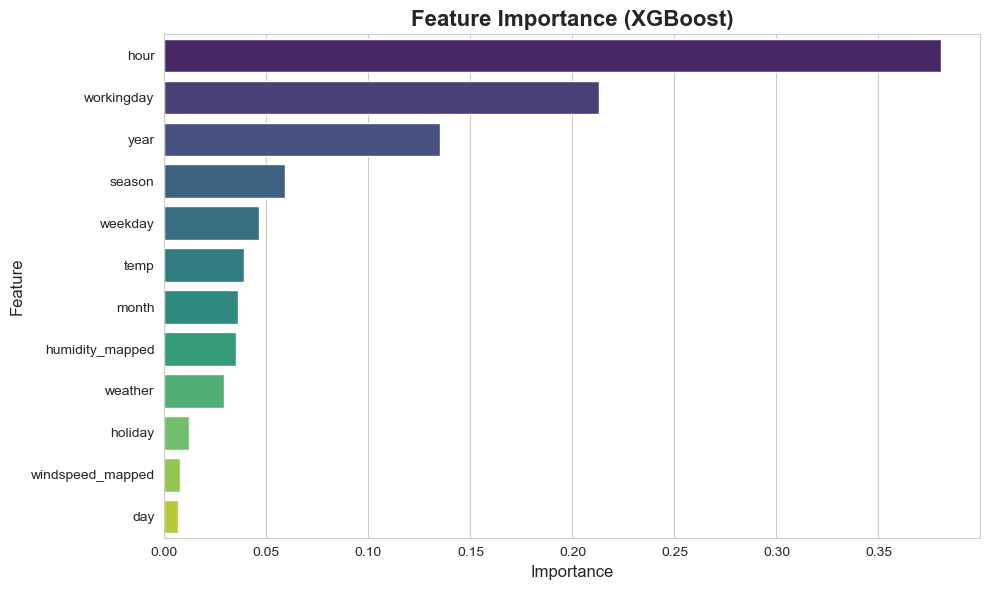

In [58]:
import seaborn as sns

import matplotlib.pyplot as plt

# 변수 중요도 추출 (XGBoost 기준)
feature_importances = xgb_model.feature_importances_
features = X_tr.columns

# 데이터프레임으로 정렬
fi_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
fi_df = fi_df.sort_values('importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance (XGBoost)', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**XGBoost Feature Importance 분석**

- 최종 개선된 XGBoost 모델을 기준으로 Feature Importance 분석을 수행.
- 시간(hour) 변수의 영향력이 가장 높게 나타났으며, workingday 여부, year, season, temp 등의 순으로 주요 Feature로 확인됨.
- 상대적으로 weather, holiday, windspeed_mapped 등은 중요도가 낮게 나타남.

※ Feature Importance 결과는 모델 해석에 참고용으로 활용 가능하며, 이후 Feature Selection/Engineering에도 적용 가능.

In [60]:
# ===== 최종 XGBoost 모델 기반 Test 데이터 예측 및 제출 파일 생성 =====

# Test 데이터 예측
y_test_pred = xgb_model.predict(X_test4)

# 로그 변환 역변환 → 실제 count 값으로 복원
count_pred = np.expm1(y_test_pred)

# 예측 결과 상위 5개 확인
print(count_pred[:5])

# Submission 파일 생성 (datetime 컬럼 + 예측 count 값)
submission = pd.DataFrame({
    'datetime': test4['datetime'],
    'count': count_pred
})

# CSV 파일로 저장
submission.to_csv('final_result_xgb_submission.csv', index=False)

# 저장된 파일 행 수 확인
print('Saved CSV shape:', submission.shape)


[11.849757   4.7522225  3.8832936  2.3800218  1.4535425]
Saved CSV shape: (6493, 2)


**최종 XGBoost 모델 기반 Test 데이터 예측 및 제출 파일 생성**

- Test 데이터셋 (X_test4)에 대해 최종 튜닝된 XGBoost 모델을 적용하여 예측 수행.
- 예측 결과는 log1p 변환을 역변환하여 실제 count 값으로 변환 후 사용.
- datetime 컬럼과 함께 submission 파일(`final_result_xgb_submission.csv`)로 저장 완료.

※ 최종 제출용 CSV는 총 **N 행**으로 생성됨 (`submission.shape` 기준 확인).  
※ 해당 결과는 Kaggle 제출용으로 활용.

**최종 제출 결과 (Kaggle Public Leaderboard)**

- 사용 모델: XGBoost 개선 튜닝 버전 (n_estimators=3000, learning_rate=0.03 등 적용)
- Feature 구성: season, day 포함 버전 사용

📌 **Kaggle 점수**

| 항목        | 점수    |
|-------------|---------|
| 개인 점수    | 0.41567 |
| 공개 점수    | 0.41567 |

※ Validation RMSLE(0.26382) 대비 Kaggle 점수에서는 성능 차이가 다소 발생했음.  
※ 이는 train/validation 데이터와 Kaggle test 데이터 간 구성 차이, Feature 구성 영향 등이 반영된 결과로 판단됨.

> 최종적으로는 XGBoost 개선 튜닝 버전이 가장 안정적인 성능을 보여 최종 제출 모델로 선정함.
